In [1]:
# ===================================================================
# PASO 1: CONFIGURACIÓN E INSTALACIÓN DE LIBRERÍAS
# ===================================================================

import pandas as pd
import requests
import sqlite3

print("✅ Librerías importadas.")

# ===================================================================
# PASO 2: EXTRACCIÓN (EXTRACT) DE LOS DATOS
# ===================================================================

# La plataforma datos.gov.co usa la API de Socrata. Podemos usarla para
# descargar los datos directamente, lo que es más eficiente que bajar un CSV.
# Aumentamos el límite para traer más filas (ajusta si es necesario).
api_url = "https://www.datos.gov.co/resource/nudc-7mev.json?$limit=50000"

print(f"📥 Extrayendo datos desde: {api_url}")

try:
    response = requests.get(api_url)
    response.raise_for_status()  # Lanza un error si la petición falla (ej: 404)
    data = response.json()
    df_raw = pd.DataFrame(data)
    print(f"✅ ¡Extracción exitosa! Se cargaron {len(df_raw)} filas.")
    display(df_raw.head())

except requests.exceptions.RequestException as e:
    print(f"❌ Error al extraer los datos: {e}")
    df_raw = pd.DataFrame() # Creamos un dataframe vacío para evitar errores posteriores

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")
    df_raw = pd.DataFrame()

✅ Librerías importadas.
📥 Extrayendo datos desde: https://www.datos.gov.co/resource/nudc-7mev.json?$limit=50000
✅ ¡Extracción exitosa! Se cargaron 14585 filas.


,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN


## Aprendiendo pandas

Queremos obtener una información sencilla del conjunto de datos

In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   a_o                          14585 non-null  object
 1   c_digo_municipio             14585 non-null  object
 2   municipio                    14585 non-null  object
 3   c_digo_departamento          14585 non-null  object
 4   departamento                 14585 non-null  object
 5   c_digo_etc                   14585 non-null  object
 6   etc                          14585 non-null  object
 7   poblaci_n_5_16               14579 non-null  object
 8   tasa_matriculaci_n_5_16      14470 non-null  object
 9   cobertura_neta               14474 non-null  object
 10  cobertura_neta_transici_n    14533 non-null  object
 11  cobertura_neta_primaria      14494 non-null  object
 12  cobertura_neta_secundaria    14491 non-null  object
 13  cobertura_neta_media         14

Generemos una "muestra" del conjunto de datos

1. Tomando los primeros registros del conjunto de datos.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_raw.head(15)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,40.23,66.8,58.14,72.86,66.87,56.32,1.19,0,1.31,0,4.08,92.26,0,96.73,83.49,93.88,6.55,0,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,33.91,48.89,44.9,21.3,62.98,54.2,65.19,69.6,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0,87.9,84.5,92.98,6.78,0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.1,26.16,7.85,15,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.5,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.9,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,51.3,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.4,0,89.63,69,78.18,9.24,0,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
5,2023,97511,Pacoa,97,Vaupés,3831,Vaupés (ETC),1678,54.29,54.29,15.44,55.69,24.91,4.62,71.39,38.93,100.3,67.92,30.03,5.35,0,7.16,2.65,6.59,94.65,0,92.84,97.35,93.41,0,0,0,0,0,23.21,25.86,30.3,14.25,6.59,NaN,NaN
6,2023,97666,Taraira,97,Vaupés,3831,Vaupés (ETC),814,22.6,22.6,14.29,34.98,0,0,23.34,23.81,57.76,0,0,0,0,0,0,0,100,0,100,0,0,0,0,0,0,0,21.58,13.33,22.29,0,0,NaN,NaN
7,2023,97777,Papunaua,97,Vaupés,3831,Vaupés (ETC),209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
8,2023,97889,Yavaraté,97,Vaupés,3831,Vaupés (ETC),561,47.95,47.95,68.75,52.19,25.84,13.04,52.05,100,69.74,36.36,27.17,4.45,0,1.89,6.58,20,95.55,0,98.11,93.42,80,0,0,0,0,0,12.33,3.13,19.5,3.95,4,NaN,NaN
9,2023,99001,Puerto Carreño,99,Vichada,3832,Vichada (ETC),4641,144.52,144.52,114.44,162.78,78.48,33.46,158.5,145.45,225.67,122.55,75.43,5.81,5.54,6.12,5.8,3.3,80.93,0,80.92,75.36,87.89,13.26,0,12.96,18.84,8.81,11.18,0.82,13.25,10.45,6.39,NaN,NaN


2. Ahora, usamos los índices para mostrar una fracción del conjunto de datos.

In [5]:
df_raw.iloc[20:30] # Pensemos en estos índices como un intervalo semi abierto [20,30)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
20,2023,94001,Inírida,94,Guainía,3829,Guainía (ETC),9673,77.42,77.33,72.7,73.75,45.35,13.11,89.34,106.92,108.59,82.48,47.78,6.42,6.75,5.08,9.29,3.66,81.12,1.46,81.57,75.11,89.01,12.46,1.46,13.35,15.6,7.33,16.19,8.47,18.36,17.25,6.11,NaN,NaN
21,2023,91798,Tarapacá,91,Amazonas,3828,Amazonas (ETC),1327,50.04,50.04,33.94,62.02,19.96,3.08,55.16,71.56,87.71,35.2,8.37,2.19,0,0.21,8.28,10.53,90.16,0,98.54,67.52,26.32,7.65,0,1.26,24.2,63.16,26.09,1.28,28.87,29.3,31.58,NaN,NaN
22,2023,91669,Puerto Santander,91,Amazonas,3828,Amazonas (ETC),618,63.75,63.75,72.34,78.03,27.1,11.83,69.74,114.89,98.11,41.59,31.18,0.95,1.85,0.39,2.25,0,95.48,0,96.53,89.89,100,3.57,0,3.09,7.87,0,16.67,1.85,19.69,16.85,16.67,NaN,NaN
23,2023,91540,Puerto Nariño,91,Amazonas,3828,Amazonas (ETC),3232,55.07,55.07,37.74,53.98,39.01,16.28,63.18,73.15,73.34,58.83,41.38,9.67,5.85,7.59,12.28,15.43,78.27,0,78.9,72.25,79.26,12.06,0,13.51,15.47,5.32,15.37,5.85,18.61,16.75,3.72,NaN,NaN
24,2023,91536,Puerto Arica,91,Amazonas,3828,Amazonas (ETC),274,83.94,83.94,44.44,87.1,55.95,20.51,95.26,81.48,120.16,79.76,58.97,0,0,0,0,0,99.62,0,99.33,100,100,0.38,0,0.67,0,0,11.49,0,12.75,10.45,17.39,NaN,NaN
25,2023,91530,Puerto Alegría,91,Amazonas,3828,Amazonas (ETC),211,65.4,65.4,40.91,63.64,37.5,0,68.72,77.27,96.97,50,0,1.38,0,0,6.25,0,91.03,0,90.63,87.5,0,7.59,0,9.38,6.25,0,18.62,29.41,19.79,9.38,0,NaN,NaN
26,2023,91460,Miriti - Paraná,91,Amazonas,3828,Amazonas (ETC),571,49.39,49.39,11.63,54.11,27.13,11.01,58.84,39.53,78.35,53.19,34.86,10.42,5.88,2.21,21,23.68,89.58,0,97.79,79,76.32,0,0,0,0,0,12.5,17.65,11.05,18,2.63,NaN,NaN
27,2023,91430,La Victoria,91,Amazonas,3828,Amazonas (ETC),169,14.2,14.2,23.53,15.49,0,0,14.2,29.41,26.76,0,0,0,0,0,0,0,100,0,100,0,0,0,0,0,0,0,16.67,20,15.79,0,0,NaN,NaN
28,2023,91407,La Pedrera,91,Amazonas,3828,Amazonas (ETC),1203,67.17,67.17,55.67,77.6,34.95,19.07,79.97,117.53,100.8,61.17,47.42,0.77,0,0,1.32,6.15,97.14,0,99.4,92.95,89.23,2.09,0,0.6,5.73,4.62,12.97,2.63,20.24,4.85,3.08,NaN,NaN
29,2023,91405,La Chorrera,91,Amazonas,3828,Amazonas (ETC),1197,50.04,50.04,48.75,45.03,33.93,9.9,57.81,67.5,61.35,61.73,35.94,5.38,0,2.45,11.36,4,84.33,5.56,85.93,80,82,10.29,5.56,11.62,8.64,14,26.42,5.56,24.77,37.27,12,NaN,NaN


In [6]:
df_raw.iloc[20:30,1:6]

,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc
20,94001,Inírida,94,Guainía,3829
21,91798,Tarapacá,91,Amazonas,3828
22,91669,Puerto Santander,91,Amazonas,3828
23,91540,Puerto Nariño,91,Amazonas,3828
24,91536,Puerto Arica,91,Amazonas,3828
25,91530,Puerto Alegría,91,Amazonas,3828
26,91460,Miriti - Paraná,91,Amazonas,3828
27,91430,La Victoria,91,Amazonas,3828
28,91407,La Pedrera,91,Amazonas,3828
29,91405,La Chorrera,91,Amazonas,3828


In [7]:
df_raw.loc[20:30] # Pensemos en estos índices como un intervalo cerrado [20,30]

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
20,2023,94001,Inírida,94,Guainía,3829,Guainía (ETC),9673,77.42,77.33,72.7,73.75,45.35,13.11,89.34,106.92,108.59,82.48,47.78,6.42,6.75,5.08,9.29,3.66,81.12,1.46,81.57,75.11,89.01,12.46,1.46,13.35,15.6,7.33,16.19,8.47,18.36,17.25,6.11,NaN,NaN
21,2023,91798,Tarapacá,91,Amazonas,3828,Amazonas (ETC),1327,50.04,50.04,33.94,62.02,19.96,3.08,55.16,71.56,87.71,35.2,8.37,2.19,0,0.21,8.28,10.53,90.16,0,98.54,67.52,26.32,7.65,0,1.26,24.2,63.16,26.09,1.28,28.87,29.3,31.58,NaN,NaN
22,2023,91669,Puerto Santander,91,Amazonas,3828,Amazonas (ETC),618,63.75,63.75,72.34,78.03,27.1,11.83,69.74,114.89,98.11,41.59,31.18,0.95,1.85,0.39,2.25,0,95.48,0,96.53,89.89,100,3.57,0,3.09,7.87,0,16.67,1.85,19.69,16.85,16.67,NaN,NaN
23,2023,91540,Puerto Nariño,91,Amazonas,3828,Amazonas (ETC),3232,55.07,55.07,37.74,53.98,39.01,16.28,63.18,73.15,73.34,58.83,41.38,9.67,5.85,7.59,12.28,15.43,78.27,0,78.9,72.25,79.26,12.06,0,13.51,15.47,5.32,15.37,5.85,18.61,16.75,3.72,NaN,NaN
24,2023,91536,Puerto Arica,91,Amazonas,3828,Amazonas (ETC),274,83.94,83.94,44.44,87.1,55.95,20.51,95.26,81.48,120.16,79.76,58.97,0,0,0,0,0,99.62,0,99.33,100,100,0.38,0,0.67,0,0,11.49,0,12.75,10.45,17.39,NaN,NaN
25,2023,91530,Puerto Alegría,91,Amazonas,3828,Amazonas (ETC),211,65.4,65.4,40.91,63.64,37.5,0,68.72,77.27,96.97,50,0,1.38,0,0,6.25,0,91.03,0,90.63,87.5,0,7.59,0,9.38,6.25,0,18.62,29.41,19.79,9.38,0,NaN,NaN
26,2023,91460,Miriti - Paraná,91,Amazonas,3828,Amazonas (ETC),571,49.39,49.39,11.63,54.11,27.13,11.01,58.84,39.53,78.35,53.19,34.86,10.42,5.88,2.21,21,23.68,89.58,0,97.79,79,76.32,0,0,0,0,0,12.5,17.65,11.05,18,2.63,NaN,NaN
27,2023,91430,La Victoria,91,Amazonas,3828,Amazonas (ETC),169,14.2,14.2,23.53,15.49,0,0,14.2,29.41,26.76,0,0,0,0,0,0,0,100,0,100,0,0,0,0,0,0,0,16.67,20,15.79,0,0,NaN,NaN
28,2023,91407,La Pedrera,91,Amazonas,3828,Amazonas (ETC),1203,67.17,67.17,55.67,77.6,34.95,19.07,79.97,117.53,100.8,61.17,47.42,0.77,0,0,1.32,6.15,97.14,0,99.4,92.95,89.23,2.09,0,0.6,5.73,4.62,12.97,2.63,20.24,4.85,3.08,NaN,NaN
29,2023,91405,La Chorrera,91,Amazonas,3828,Amazonas (ETC),1197,50.04,50.04,48.75,45.03,33.93,9.9,57.81,67.5,61.35,61.73,35.94,5.38,0,2.45,11.36,4,84.33,5.56,85.93,80,82,10.29,5.56,11.62,8.64,14,26.42,5.56,24.77,37.27,12,NaN,NaN


3. Tomar una muestra aleatoria del conjunto de datos

In [8]:
df_raw.sample(frac = 0.01, random_state=123456)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
10516,2014,50330,Mesetas,50,Meta,3796,Meta (ETC),2904,76.41,89.01,69.94,74.11,66.11,43.68,85.85,64.17,116.79,75.39,37.5,1.89,0.65,2.27,1.61,0.81,98.11,0,97.73,98.39,99.19,0,0,0,0,0,0,0,0,0,0,25.59,1.75
2152,2022,5628,Sabanalarga,5,Antioquia,3758,Antioquia (ETC),2046,79.33,79.33,50,75.84,72.38,34.94,85.58,66.15,92.17,95.52,58.01,1.8,2.36,1.09,2.78,1.38,97.54,0,98.18,96.35,98.62,0.66,0,0.73,0.87,0,8.32,0,12.39,6.09,1.38,NaN,NaN
9454,2015,41660,Saladoblanco,41,Huila,3790,Huila (ETC),3108,86.87,86.87,70.44,90.16,72.23,30.36,96.59,93.43,113.17,98.53,50,4.3,3.91,3.13,6,5.88,92.62,0,91.31,93.53,93.67,3.07,0,5.56,0.47,0.45,2.68,1.95,3.96,1.29,0.45,33.45,12.5
10130,2014,97889,Yavaraté,97,Vaupés,3831,Vaupés (ETC),386,75.39,87.65,52,70.59,60.76,33.33,86.01,80.65,125.15,60.77,38.71,2.71,NaN,1.96,6.33,NaN,97.29,0,98.04,93.67,100,0,0,0,0,0,3.61,0,4.9,2.53,0,9.76,16.67
11152,2014,5411,Liborina,5,Antioquia,3758,Antioquia (ETC),1985,105.29,89.66,71.79,77.81,68.57,56.41,117.43,109.09,149.4,112.55,68.94,1.53,0.64,0.63,3.19,1.51,98.47,0,99.37,96.81,98.49,0,0,0,0,0,2.87,2.56,2.34,3.62,3.52,27.09,73.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,2019,50251,El Castillo,50,Meta,3796,Meta (ETC),1766,95.13,95.13,58.7,94.09,78.35,43.73,102.49,84.78,115.52,106.28,70.85,6.29,3.42,3.58,11.17,4.81,90.2,0,92.25,84.94,93.58,3.52,0,4.17,3.89,1.6,1.44,0,1.19,2.54,0,NaN,NaN
11711,2013,41503,Oporapa,41,Huila,3790,Huila (ETC),3997,68.83,68.8,67.8,77.4,58.5,26,73.9,79.8,88.7,69.3,41.4,3.84,1.51,2.23,7.41,3.17,90.37,0,93.3,83.45,88.69,5.79,0,4.47,9.14,8.14,1.26,0,2.09,0.58,0,NaN,11.11
9773,2015,15897,Zetaquira,15,Boyacá,3769,Boyacá (ETC),981,97.96,97.96,74.7,84.56,100.3,70.07,107.03,81.93,96.44,116.67,129.93,0.99,NaN,0.49,0.8,3.03,96.75,0,99.51,94.68,93.33,2.27,0,0,4.52,3.64,0.79,0,1.48,0.53,0,27.27,0
3428,2020,81065,Arauquita,81,Arauca,3824,Arauca (ETC),13580,68.03,68.03,42.21,67.19,53.53,24.5,76.08,70.52,88.75,75.03,47.58,4.39,3.97,4.22,4.56,5.33,85.71,3.49,87.82,79.93,87.31,9.9,3.49,7.96,15.51,7.36,6.42,1.93,5.15,10.88,2.03,NaN,NaN


In [9]:
df_raw.sample(n = 10, random_state=123456)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
10516,2014,50330,Mesetas,50,Meta,3796,Meta (ETC),2904,76.41,89.01,69.94,74.11,66.11,43.68,85.85,64.17,116.79,75.39,37.5,1.89,0.65,2.27,1.61,0.81,98.11,0,97.73,98.39,99.19,0,0,0,0,0,0,0,0,0,0,25.59,1.75
2152,2022,5628,Sabanalarga,5,Antioquia,3758,Antioquia (ETC),2046,79.33,79.33,50,75.84,72.38,34.94,85.58,66.15,92.17,95.52,58.01,1.8,2.36,1.09,2.78,1.38,97.54,0,98.18,96.35,98.62,0.66,0,0.73,0.87,0,8.32,0,12.39,6.09,1.38,NaN,NaN
9454,2015,41660,Saladoblanco,41,Huila,3790,Huila (ETC),3108,86.87,86.87,70.44,90.16,72.23,30.36,96.59,93.43,113.17,98.53,50,4.3,3.91,3.13,6,5.88,92.62,0,91.31,93.53,93.67,3.07,0,5.56,0.47,0.45,2.68,1.95,3.96,1.29,0.45,33.45,12.5
10130,2014,97889,Yavaraté,97,Vaupés,3831,Vaupés (ETC),386,75.39,87.65,52,70.59,60.76,33.33,86.01,80.65,125.15,60.77,38.71,2.71,NaN,1.96,6.33,NaN,97.29,0,98.04,93.67,100,0,0,0,0,0,3.61,0,4.9,2.53,0,9.76,16.67
11152,2014,5411,Liborina,5,Antioquia,3758,Antioquia (ETC),1985,105.29,89.66,71.79,77.81,68.57,56.41,117.43,109.09,149.4,112.55,68.94,1.53,0.64,0.63,3.19,1.51,98.47,0,99.37,96.81,98.49,0,0,0,0,0,2.87,2.56,2.34,3.62,3.52,27.09,73.53
2210,2022,5134,Campamento,5,Antioquia,3758,Antioquia (ETC),2223,72.15,72.15,40.46,72.37,55.45,31.15,81.38,54.34,91.55,82.79,65.57,5.71,3.19,4.02,9.62,2.65,86.65,0,85.56,83.39,96.3,7.65,0,10.41,6.99,1.06,9.12,0,13.49,6.99,0.53,NaN,NaN
6968,2017,68368,Jesús María,68,Santander,3808,Santander (ETC),657,87.2,87.21,45.76,75,88.57,72.32,97.72,79.66,83.7,113.33,112.5,1.79,4.26,0.87,3.14,0,92.37,0,94.37,87.44,96.52,5.84,0,4.76,9.42,3.48,0,0,0,0,0,25.333,8.33
8852,2016,73675,San Antonio,73,Tolima,3815,Tolima (ETC),3510,90.9,90.85,47.04,90.09,80.86,40.97,102.36,67.6,108.26,112.91,84.17,4.82,4.61,4.27,6.05,3.39,88.49,0,89.13,85.38,91.53,6.69,0,6.59,8.57,5.08,0.18,0,0.12,0.18,0.68,24.985,56.67
13385,2012,5475,Murindó,5,Antioquia,3758,Antioquia (ETC),1023,95.6,95.6,62.8,106.2,24,10,103.5,71.8,190.3,47.7,19.4,4.06,5.36,1.99,11.04,NaN,95.94,0,98.01,88.96,82.86,0,0,0,0,0,0,0,0,0,0,30.33,5
2067,2022,13458,Montecristo,13,Bolívar,3767,Bolívar (ETC),4308,75.35,75.35,46.67,74.08,48.47,9.74,83.22,106.67,104.26,74.35,21.73,8.08,11.61,5.68,12.01,4.46,82.18,1.79,83.45,75.87,93.75,9.74,1.79,10.87,12.12,1.79,13.41,3.79,16.19,13.2,3.57,NaN,NaN


In [10]:
df_raw.tail(20)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
14565,2011,5107,Briceño,5,Antioquia,3758,Antioquia (ETC),2256,94.1,94.1,74.5,99.6,49.1,12.3,106.9,118.6,143.2,100.4,28.6,9.79,NaN,10.59,7.28,2.63,89.71,0,88.51,92.72,97.37,0.5,0,0.9,0,0,0.91,0,1.28,0.67,0,16.28,83.33
14566,2011,5101,Ciudad Bolívar,5,Antioquia,3758,Antioquia (ETC),6651,88.24,88.2,70,94.5,64.3,32.5,94,81.6,117.5,88,53.6,5.97,6.68,5.2,7.8,3.87,93.87,0,94.77,92.2,94.5,0.15,0,0.03,0,1.63,4.13,0,5.24,3.54,2.77,20.75,97.06
14567,2011,5093,Betulia,5,Antioquia,3758,Antioquia (ETC),4260,95.45,95.5,78.6,103,64.4,21.7,105.2,87.5,133.2,100.2,52.5,5,2.86,6.15,4.1,1.05,84.05,0.63,82.74,82.09,89.2,10.95,0.63,11.11,13.81,9.76,0.08,0,0.12,0,0,26.89,87.8
14568,2011,5091,Betania,5,Antioquia,3758,Antioquia (ETC),2345,89.85,89.9,58.6,96.4,59,17.4,98.8,73.2,129.7,95.2,41.4,2.65,NaN,3.17,2.76,NaN,97.35,0,96.83,97.24,100,0,0,0,0,0,0.48,0,0.72,0.17,0,30.56,96.3
14569,2011,5088,Bello,5,Antioquia,3760,Bello,91582,82.53,82.4,62.2,79.1,71.6,45.2,93.3,73.5,94.6,103.8,79.3,2.76,2.25,2.3,3.55,2.45,96.98,0,97.58,96.34,96.2,0.26,0,0.12,0.11,1.35,3.12,0.41,2.39,5.03,1.63,28.52,87.5
14570,2011,5086,Belmira,5,Antioquia,3758,Antioquia (ETC),1700,97.76,97.8,96.5,112.5,61.6,41,101.4,107.1,135.6,80.5,59,6.9,9.27,7.36,6.24,4.09,92,0,90.72,93.76,95.32,1.1,0,1.92,0,0.58,NaN,0.66,NaN,NaN,5.85,26.95,100
14571,2011,5079,Barbosa,5,Antioquia,3758,Antioquia (ETC),10933,82.05,82.1,57.9,79.5,71.8,42.2,88.1,75,96,92.6,66.7,3.01,2.13,2.6,3.53,3.56,87.55,0,89.85,84,83.43,9.44,0,7.55,12.47,13.01,1.02,0,0.54,2.07,0.57,29.49,84
14572,2011,5059,Armenia,5,Antioquia,3758,Antioquia (ETC),1097,87.97,88,67.4,81.2,72.7,29.8,98.8,83.2,108.3,109.5,63.4,5.19,5.41,6.5,4.12,2.11,89.01,0,86.38,93.24,83.16,5.79,0,7.11,2.65,14.74,4.21,0,4.3,6.18,0,17.79,100
14573,2011,5055,Argelia,5,Antioquia,3758,Antioquia (ETC),2460,88.58,88.6,66.7,85.2,66.4,23.9,103.7,73.5,118.5,110.8,61.8,5.06,6.21,5.4,5.28,1.05,94.9,0,94.6,94.72,98.42,0.04,0,0,0,0.53,NaN,0,NaN,2.3,1.27,31.07,82.98
14574,2011,5051,Arboletes,5,Antioquia,3758,Antioquia (ETC),10673,84.85,84.9,71.1,86,55.9,26.7,103.8,87.6,116.3,107,72.7,3.18,6.96,2.9,2.95,2.29,93.6,0,94,93.31,92.79,3.23,0,3.1,3.74,4.91,2.25,0.66,2.41,2.85,0.73,26.36,47.22


Vamos a crear una copia del conjunto de datos, para cambiar los índices

In [11]:
df_raw2 = df_raw.copy()

In [12]:
df_raw.shape # Lo mismo que dim de R

(14585, 41)

In [13]:
df_raw2['new_index'] = range(1,df_raw.shape[0]+1)

In [14]:
df_raw2.set_index('new_index',inplace=True)

In [15]:
df_raw2.head()

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
new_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,40.23,66.8,58.14,72.86,66.87,56.32,1.19,0,1.31,0,4.08,92.26,0,96.73,83.49,93.88,6.55,0,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
2,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,33.91,48.89,44.9,21.3,62.98,54.2,65.19,69.6,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0,87.9,84.5,92.98,6.78,0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
3,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.1,26.16,7.85,15,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.5,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
4,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.9,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
5,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,51.3,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.4,0,89.63,69,78.18,9.24,0,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN


Para evaluar si existen registros repetidos, usamos el método `drop_duplicates`

In [16]:
df_raw.drop_duplicates().shape

(14585, 41)

## Conversión de variables, según su naturaleza

In [17]:
df_raw['tasa_matriculaci_n_5_16'] = df_raw['tasa_matriculaci_n_5_16'].astype(float)

In [18]:
df_raw['tasa_matriculaci_n_5_16'].describe()

count    14470.000000
mean        84.971929
std         18.589112
min          0.000000
25%         74.850000
50%         85.330000
75%         95.380000
max        279.030000
Name: tasa_matriculaci_n_5_16, dtype: float64

Ahora, vamos a generar una estadística de resumen a nivel de departamentos

In [19]:
df_raw.groupby(['c_digo_departamento','departamento'])['tasa_matriculaci_n_5_16'].mean().reset_index()

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,0,NACIONAL,0.922600
1,05,Antioquia,84.215040
2,08,Atlántico,83.640435
3,11,Bogotá D.C.,96.410000
4,11,"Bogotá, D.C.",86.860833
5,13,Bolívar,86.463798
6,15,Boyacá,82.983827
7,17,Caldas,82.187436
8,18,Caquetá,75.105529
9,19,Cauca,79.346987


Como `NACIONAL` no es un departamento, procedemos a quitarlo.

In [20]:
df_raw[df_raw['departamento']!= 'NACIONAL'] # data.table de R

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,40.23,66.8,58.14,72.86,66.87,56.32,1.19,0,1.31,0,4.08,92.26,0,96.73,83.49,93.88,6.55,0,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,33.91,48.89,44.9,21.3,62.98,54.2,65.19,69.6,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0,87.9,84.5,92.98,6.78,0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.1,26.16,7.85,15,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.5,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.9,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.30,51.3,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.4,0,89.63,69,78.18,9.24,0,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707,78.85,78.9,56.2,82.4,59.9,26.4,82.8,77.4,105,80.4,40.1,8.14,6.6,6.1,13.17,2.44,86.27,0,90.29,77.32,90.24,5.59,0,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100
14581,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244,84.45,84.5,65.1,83.7,62,32.2,91.7,81.1,107.5,89.9,61.4,3.96,3.06,4.3,4.36,1.68,95.46,0,95.12,95.61,95.63,0.58,0,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44
14582,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552,97.71,97.7,61.7,107.2,65.1,27.3,108.4,77.9,146.8,97.3,53.9,8.75,5.83,8.59,9.49,9.74,91.25,0,91.41,90.51,90.26,0,0,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45
14583,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631,78.65,78.7,55.3,76.3,70.7,38.9,87.7,74.3,89.8,96.3,73.2,4.16,2.39,3.23,6.12,3.21,86.86,0.24,90.04,79.42,89.34,8.99,0.24,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33


In [21]:
df_raw.query("departamento != 'NACIONAL'")

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,40.23,66.8,58.14,72.86,66.87,56.32,1.19,0,1.31,0,4.08,92.26,0,96.73,83.49,93.88,6.55,0,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,33.91,48.89,44.9,21.3,62.98,54.2,65.19,69.6,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0,87.9,84.5,92.98,6.78,0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.1,26.16,7.85,15,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.5,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.9,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.30,51.3,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.4,0,89.63,69,78.18,9.24,0,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707,78.85,78.9,56.2,82.4,59.9,26.4,82.8,77.4,105,80.4,40.1,8.14,6.6,6.1,13.17,2.44,86.27,0,90.29,77.32,90.24,5.59,0,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100
14581,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244,84.45,84.5,65.1,83.7,62,32.2,91.7,81.1,107.5,89.9,61.4,3.96,3.06,4.3,4.36,1.68,95.46,0,95.12,95.61,95.63,0.58,0,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44
14582,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552,97.71,97.7,61.7,107.2,65.1,27.3,108.4,77.9,146.8,97.3,53.9,8.75,5.83,8.59,9.49,9.74,91.25,0,91.41,90.51,90.26,0,0,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45
14583,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631,78.65,78.7,55.3,76.3,70.7,38.9,87.7,74.3,89.8,96.3,73.2,4.16,2.39,3.23,6.12,3.21,86.86,0.24,90.04,79.42,89.34,8.99,0.24,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33


In [22]:
resumen_matriculados_v0=(
    df_raw
    .query("departamento != 'NACIONAL'")
    .groupby(['c_digo_departamento','departamento'])
    ['tasa_matriculaci_n_5_16']
    .mean()
    .reset_index()
)

In [23]:
len(resumen_matriculados_v0['c_digo_departamento'][0]) # Longitud de un string

2

In [24]:
def ajuste_cod_depto(codigo):
    if len(codigo)==1:
        codigo = '0' + codigo
    return codigo

Vamos a aplicar esta función a todo el conjunto de datos

In [25]:
df_raw['c_digo_departamento'] = df_raw['c_digo_departamento'].apply(ajuste_cod_depto)

In [26]:
(
    df_raw
    .query("departamento != 'NACIONAL'")
    .groupby(['c_digo_departamento','departamento'])
    ['tasa_matriculaci_n_5_16']
    .mean()
    .reset_index()
)

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,05,Antioquia,87.887206
1,08,Atlántico,89.455816
2,11,Bogotá D.C.,96.410000
3,11,"Bogotá, D.C.",86.860833
4,13,Bolívar,86.463798
5,15,Boyacá,82.983827
6,17,Caldas,82.187436
7,18,Caquetá,75.105529
8,19,Cauca,79.346987
9,20,Cesar,96.113944


In [27]:
tabla_deptos = (
    df_raw
    .query("departamento != 'NACIONAL'")
    [['c_digo_departamento','departamento']]
    .drop_duplicates()
    .groupby('c_digo_departamento')
    .sample(n=1, random_state=1)
    .reset_index()
    .drop(columns= 'index')
)

In [28]:
df_raw = (
    df_raw
    .query("departamento != 'NACIONAL'")
    .drop(columns = 'departamento')
    .merge(tabla_deptos, on = 'c_digo_departamento', how = 'left')
)

In [29]:
(
    df_raw
    .query("departamento != 'NACIONAL'")
    .groupby(['c_digo_departamento','departamento'])
    ['tasa_matriculaci_n_5_16']
    .mean()
    .reset_index()
)

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,05,Antioquia,87.887206
1,08,Atlántico,89.455816
2,11,"Bogotá, D.C.",87.595385
3,13,Bolívar,86.463798
4,15,Boyacá,82.983827
5,17,Caldas,82.187436
6,18,Caquetá,75.105529
7,19,Cauca,79.346987
8,20,Cesar,96.113944
9,23,Córdoba,88.003057


Con respecto a la población del municipio, qué porcentaje de escolaridad hay?

In [30]:
def longitud_cod_mpio(codigo):
    return len(codigo)

set(
    df_raw
    .query("departamento != 'NACIONAL'")
    .assign(len_codigo_mpio = lambda x: x['c_digo_municipio'].apply(longitud_cod_mpio)) # análogo a la función mutate de dplyr en R
    ['len_codigo_mpio']
    .astype(str)
)

{'4', '5'}

In [31]:
def ajuste_cod_mpio(codigo):
    if len(codigo)==4:
        codigo = '0' + codigo
    return codigo

In [32]:
df_raw['c_digo_municipio'] = df_raw['c_digo_municipio'].apply(ajuste_cod_mpio)

In [33]:
df_raw.head()

,a_o,c_digo_municipio,municipio,c_digo_departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,departamento
0,2023,05004,Abriaquí,05,3758,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,40.23,66.8,58.14,72.86,66.87,56.32,1.19,0,1.31,0,4.08,92.26,0,96.73,83.49,93.88,6.55,0,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,Antioquia
1,2023,95025,El Retorno,95,3830,Guaviare (ETC),4438,53.27,53.27,33.91,48.89,44.9,21.3,62.98,54.2,65.19,69.6,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0,87.9,84.5,92.98,6.78,0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,Guaviare
2,2023,95200,Miraflores,95,3830,Guaviare (ETC),2014,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.1,26.16,7.85,15,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.5,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,Guaviare
3,2023,97001,Mitú,97,3831,Vaupés (ETC),10986,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.9,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN,Vaupés
4,2023,97161,Caruru,97,3831,Vaupés (ETC),1228,51.30,51.3,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.4,0,89.63,69,78.18,9.24,0,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN,Vaupés


In [34]:
df_raw.head()

,a_o,c_digo_municipio,municipio,c_digo_departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,departamento
0,2023,05004,Abriaquí,05,3758,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,40.23,66.8,58.14,72.86,66.87,56.32,1.19,0,1.31,0,4.08,92.26,0,96.73,83.49,93.88,6.55,0,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,Antioquia
1,2023,95025,El Retorno,95,3830,Guaviare (ETC),4438,53.27,53.27,33.91,48.89,44.9,21.3,62.98,54.2,65.19,69.6,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0,87.9,84.5,92.98,6.78,0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,Guaviare
2,2023,95200,Miraflores,95,3830,Guaviare (ETC),2014,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.1,26.16,7.85,15,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.5,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,Guaviare
3,2023,97001,Mitú,97,3831,Vaupés (ETC),10986,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.9,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN,Vaupés
4,2023,97161,Caruru,97,3831,Vaupés (ETC),1228,51.30,51.3,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.4,0,89.63,69,78.18,9.24,0,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN,Vaupés


In [35]:
ajuste_cod_depto('11')

'11'

In [36]:
df_raw.columns.to_list()

['a_o',
 'c_digo_municipio',
 'municipio',
 'c_digo_departamento',
 'c_digo_etc',
 'etc',
 'poblaci_n_5_16',
 'tasa_matriculaci_n_5_16',
 'cobertura_neta',
 'cobertura_neta_transici_n',
 'cobertura_neta_primaria',
 'cobertura_neta_secundaria',
 'cobertura_neta_media',
 'cobertura_bruta',
 'cobertura_bruta_transici_n',
 'cobertura_bruta_primaria',
 'cobertura_bruta_secundaria',
 'cobertura_bruta_media',
 'deserci_n',
 'deserci_n_transici_n',
 'deserci_n_primaria',
 'deserci_n_secundaria',
 'deserci_n_media',
 'aprobaci_n',
 'aprobaci_n_transici_n',
 'aprobaci_n_primaria',
 'aprobaci_n_secundaria',
 'aprobaci_n_media',
 'reprobaci_n',
 'reprobaci_n_transici_n',
 'reprobaci_n_primaria',
 'reprobaci_n_secundaria',
 'reprobaci_n_media',
 'repitencia',
 'repitencia_transici_n',
 'repitencia_primaria',
 'repitencia_secundaria',
 'repitencia_media',
 'tama_o_promedio_de_grupo',
 'sedes_conectadas_a_internet',
 'departamento']

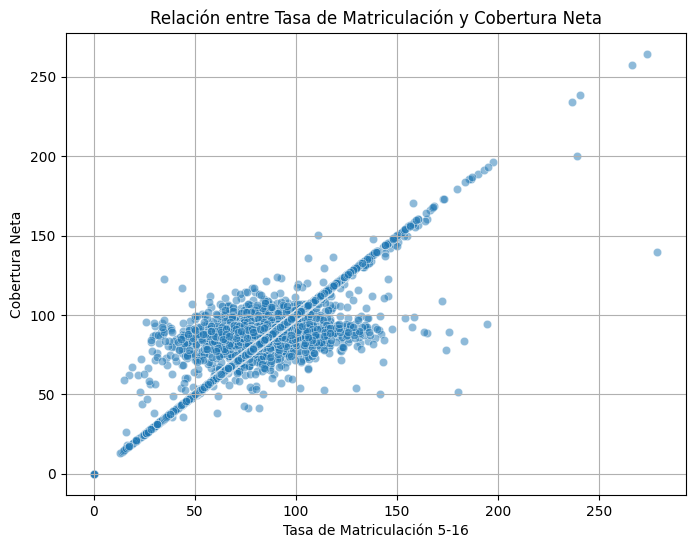

In [37]:
import seaborn as sns

import matplotlib.pyplot as plt

# Asegúrate de convertir cobertura_neta a numérico
df_raw['cobertura_neta'] = pd.to_numeric(df_raw['cobertura_neta'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_raw,
    x='tasa_matriculaci_n_5_16',
    y='cobertura_neta',
    alpha=0.5
)
plt.xlabel('Tasa de Matriculación 5-16')
plt.ylabel('Cobertura Neta')
plt.title('Relación entre Tasa de Matriculación y Cobertura Neta')
plt.grid(True)
plt.show()

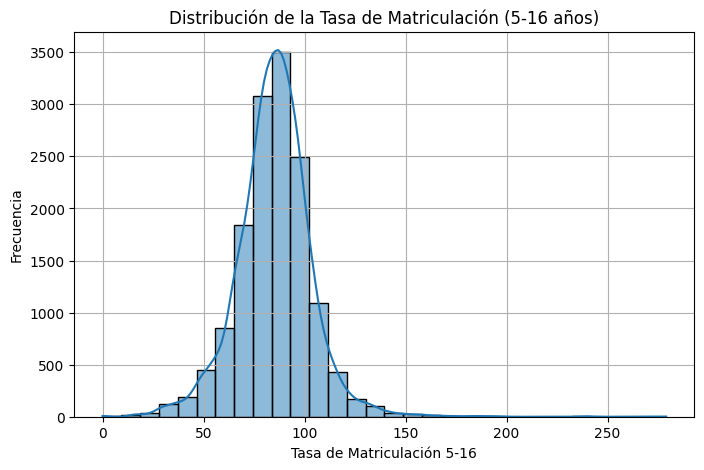

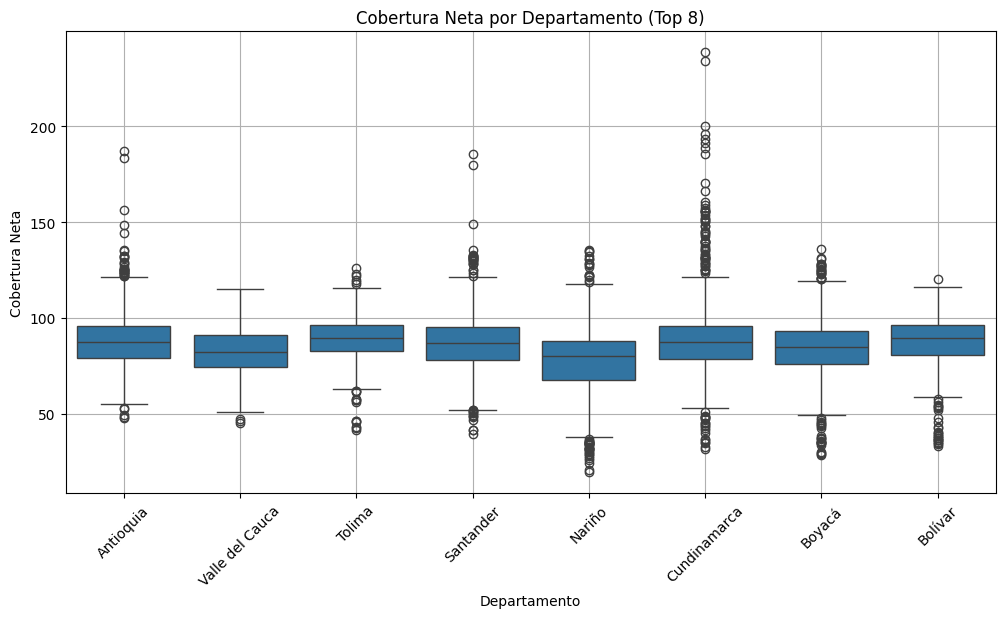

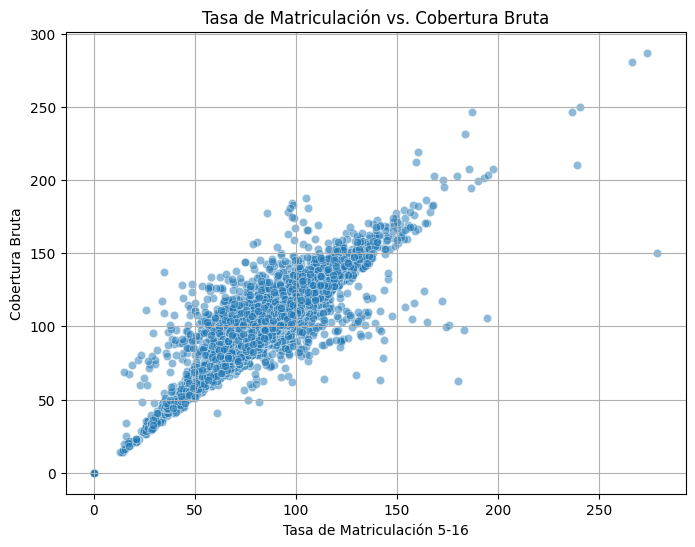

C:\Users\juanF\AppData\Local\Temp\ipykernel_21984\743461310.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_depto.values, y=promedio_depto.index, palette='viridis')


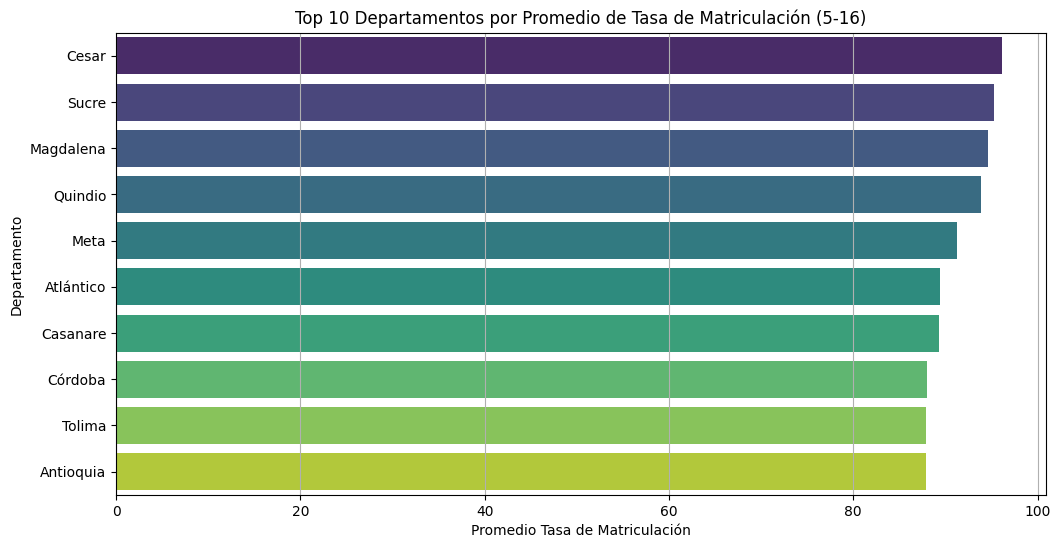

In [38]:
# Histograma de la tasa de matriculación 5-16
plt.figure(figsize=(8, 5))
sns.histplot(df_raw['tasa_matriculaci_n_5_16'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Tasa de Matriculación (5-16 años)')
plt.xlabel('Tasa de Matriculación 5-16')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de cobertura neta por departamento (solo algunos para visualización)
plt.figure(figsize=(12, 6))
top_deptos = df_raw['departamento'].value_counts().index[:8]
sns.boxplot(
    data=df_raw[df_raw['departamento'].isin(top_deptos)],
    x='departamento',
    y='cobertura_neta'
)
plt.title('Cobertura Neta por Departamento (Top 8)')
plt.xlabel('Departamento')
plt.ylabel('Cobertura Neta')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gráfico de dispersión: tasa de matriculación vs. cobertura bruta
plt.figure(figsize=(8, 6))
df_raw['cobertura_bruta'] = pd.to_numeric(df_raw['cobertura_bruta'], errors='coerce')
sns.scatterplot(
    data=df_raw,
    x='tasa_matriculaci_n_5_16',
    y='cobertura_bruta',
    alpha=0.5
)
plt.xlabel('Tasa de Matriculación 5-16')
plt.ylabel('Cobertura Bruta')
plt.title('Tasa de Matriculación vs. Cobertura Bruta')
plt.grid(True)
plt.show()

# Gráfico de barras: promedio de tasa de matriculación por departamento
plt.figure(figsize=(12, 6))
promedio_depto = (
    df_raw.groupby('departamento')['tasa_matriculaci_n_5_16']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=promedio_depto.values, y=promedio_depto.index, palette='viridis')
plt.title('Top 10 Departamentos por Promedio de Tasa de Matriculación (5-16)')
plt.xlabel('Promedio Tasa de Matriculación')
plt.ylabel('Departamento')
plt.grid(True, axis='x')
plt.show()

## Crear una bodega de datos

En esta bodega de datos, la idea es "subir" ambos conjuntos de datos y procesarlos desde SQL en una consulta

In [72]:
conn = sqlite3.connect("Datos2.db")
cursor = conn.cursor()

In [73]:
datos_2005_2019 = pd.read_excel("D:\Documentos\Repos\diplomado-gestion-datos\Datos\Info_2005_2019.xlsx")
datos_2020_2035 = pd.read_excel("D:\Documentos\Repos\diplomado-gestion-datos\Datos\Info_2020_2035.xlsx")

In [74]:
datos_2005_2019.to_sql("informacion_antes_pandemia",conn)
datos_2020_2035.to_sql("informacion_despues_pandemia",conn)

53856

In [86]:
datos_2020_2035.head()

,DP,DPNOM,MPIO,DPMP,AÑO,ÁREA GEOGRÁFICA,Población
0,5,Antioquia,5001,Medellín,2020,Cabecera Municipal,2476569
1,5,Antioquia,5001,Medellín,2020,Centros Poblados y Rural Disperso,43023
2,5,Antioquia,5001,Medellín,2020,Total,2519592
3,5,Antioquia,5001,Medellín,2021,Cabecera Municipal,2506656
4,5,Antioquia,5001,Medellín,2021,Centros Poblados y Rural Disperso,42352


In [93]:
consulta = """
CREATE TABLE info_proyeccion_mpios
AS

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_antes_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'

UNION ALL

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'

"""

conn.execute(consulta)

In [105]:
consulta = """
CREATE TABLE info_proyeccion_mpios_v2
AS

WITH Tabla_Antes AS (

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_antes_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'
)

, Tabla_Despues AS (

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'
)

SELECT * FROM Tabla_Antes
UNION ALL
SELECT * FROM Tabla_Despues
"""

conn.execute(consulta)

In [120]:
consulta2 = """
SELECT * FROM info_proyeccion_mpios
"""

info_proyecciones_dane = pd.read_sql_query(consulta2,conn)

In [122]:
info_proyecciones_dane.query("c_digo_departamento == '95'")

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total


In [112]:
(
    df_raw
    .assign(a_o = lambda x: x['a_o'].astype(int))
    .merge(info_proyecciones_dane.drop(columns = 'c_digo_departamento'), 
           on = ['c_digo_municipio','a_o'], how = 'left')
)

,a_o,c_digo_municipio,municipio,c_digo_departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,departamento,poblacion_total
0,2023,05004,Abriaquí,05,3758,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,40.23,66.8,58.14,72.86,66.87,56.32,1.19,0,1.31,0,4.08,92.26,0,96.73,83.49,93.88,6.55,0,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,Antioquia,2841.0
1,2023,95025,El Retorno,95,3830,Guaviare (ETC),4438,53.27,53.27,33.91,48.89,44.9,21.3,62.98,54.2,65.19,69.6,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0,87.9,84.5,92.98,6.78,0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,Guaviare,NaN
2,2023,95200,Miraflores,95,3830,Guaviare (ETC),2014,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.1,26.16,7.85,15,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.5,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,Guaviare,NaN
3,2023,97001,Mitú,97,3831,Vaupés (ETC),10986,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.9,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN,Vaupés,NaN
4,2023,97161,Caruru,97,3831,Vaupés (ETC),1228,51.30,51.3,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.4,0,89.63,69,78.18,9.24,0,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN,Vaupés,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14577,2011,05036,Angelópolis,05,3758,Antioquia (ETC),1707,78.85,78.9,56.2,82.4,59.9,26.4,82.8,77.4,105,80.4,40.1,8.14,6.6,6.1,13.17,2.44,86.27,0,90.29,77.32,90.24,5.59,0,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100,Antioquia,5801.0
14578,2011,05034,Andes,05,3758,Antioquia (ETC),10244,84.45,84.5,65.1,83.7,62,32.2,91.7,81.1,107.5,89.9,61.4,3.96,3.06,4.3,4.36,1.68,95.46,0,95.12,95.61,95.63,0.58,0,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44,Antioquia,42173.0
14579,2011,05031,Amalfi,05,3758,Antioquia (ETC),5552,97.71,97.7,61.7,107.2,65.1,27.3,108.4,77.9,146.8,97.3,53.9,8.75,5.83,8.59,9.49,9.74,91.25,0,91.41,90.51,90.26,0,0,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45,Antioquia,24156.0
14580,2011,05030,Amagá,05,3758,Antioquia (ETC),6631,78.65,78.7,55.3,76.3,70.7,38.9,87.7,74.3,89.8,96.3,73.2,4.16,2.39,3.23,6.12,3.21,86.86,0.24,90.04,79.42,89.34,8.99,0.24,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33,Antioquia,28354.0


In [116]:
set(df_raw.query('c_digo_departamento == "95"')['municipio'])

{'Calamar', 'El Retorno', 'Miraflores', 'San José del Guaviare'}

In [117]:
info_proyecciones_dane.query('c_digo_departamento == "95"')

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total


In [ ]:
consulta4 = """
ALTER TABLE info_proyeccion_mpios_v2
AS

WITH Tabla_Antes AS (

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_antes_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'
)

, Tabla_Despues AS (

SELECT 
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE `ÁREA GEOGRÁFICA` = 'Total'
)

SELECT * FROM Tabla_Antes
UNION ALL
SELECT * FROM Tabla_Despues
"""

conn.execute(consulta)

In [124]:
consulta3 = """
SELECT
CASE WHEN LENGTH(CAST(DP AS STRING)) = 1 THEN CONCAT('0',CAST(DP AS STRING))
ELSE CAST(DP AS STRING) END AS c_digo_departamento,
CASE WHEN LENGTH(CAST(MPIO AS STRING)) = 4 THEN CONCAT('0',CAST(MPIO AS STRING))
ELSE CAST(MPIO AS STRING) END AS c_digo_municipio,
AÑO AS a_o,
Población AS poblacion_total
FROM informacion_despues_pandemia
WHERE DP = 95 
AND `ÁREA GEOGRÁFICA` = 'Total'
"""

pd.read_sql_query(consulta3, conn)

,c_digo_departamento,c_digo_municipio,a_o,poblacion_total
0,95,95001,2020,56294
1,95,95001,2021,57717
2,95,95001,2022,59555
3,95,95001,2023,61403
4,95,95001,2024,63208
...,...,...,...,...
59,95,95200,2031,9643
60,95,95200,2032,9833
61,95,95200,2033,10040
62,95,95200,2034,10227
